In [219]:
%matplotlib inline
%load_ext autoreload
%autoreload

from quanty.model import backtester as q
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
db = dm.read_db(base='prices_global.pkl', add='prices_kr.pkl')
db_kr = dm.read_db(base='prices_kr.pkl', add='prices_global.pkl')

In [236]:
base_params = {
    'start': '2002-12-31', 
    'end': '2018-08-31', #'2018-03-31', 
    'db': db, 
    'assets': setting.assets_global_eq, 
    'price': {'price_src':'reprice', 'trade_tol':'at_close'}, 
    'trade': {
        'trade_assets': [
            #('BND_US_Long', {'BND_US_Interm':0.3, 'BND_US_Short':0.1}), 
            #('BND_US_Long', {'BND_US_Long':1.0}), 
        ], 
        'trade_prev_nav_based': True, 
        'trade_delay': 1, 
        'freq': '1M', 
        'cash': 100000000, 
        'expense': 0.001, 
        'gr_exposure': 0.99, }, 
    'selecting': {
        'mode': 'DualMomentum', #'DualMomentum', 'AbsoluteMomentum', 'RelativeMomentum'
        'sig_mixer': {
            'sig_w_base': [1,0,0,0,0,0,1,0,0,0,0,0], #[1,0,0,0,0,0,1,0,0,0.25*4,0.25*6,0.25*12]
            'sig_w_term': 21, 
            'sig_w_dynamic': True, 
            'sig_dyn_fwd': 21*np.array([1,2]), 
            'sig_dyn_m_backs': 24, 
            'sig_dyn_n_sample': 63, 
            'sig_dyn_thres': 0.0, }, 
        'market': 'ACWI', # None도 가능
        'supporter': 'BND_US_Long', 
        'cash_equiv': 'BND_US_AGG', 
        #'overwrite_to_bet': [], # base_params flattening 하므로, 반드시 list of tuple로 입력
        'n_picks': 10, }, 
    'weighting': {
        'w_type': 'ranky2', 
        'eaa_wr': 1.0, 
        'eaa_wc': 1.0, 
        'eaa_wr_bnd': 0.5, 
        'eaa_short_period': 20, 
        'iv_period': 60, 
        'w_max': 1.0, }, 
    'stats_opts': {
        'beta_to': 'ACWI', 
        'stats_n_roll': 250, }, 
    'reinforce': {
        'follow_trend': (20,60), 
        'follow_trend_market': (20, 60),
        'follow_trend_supporter': (20, 60), 
        'support_cash': True, }, 
    'te_control': {
        'bm': None, #'ACWI', 
        'te_target': None, 
        'te_k': 0.3, 
        'te_short_period': 20, 
        'te_short_up_down_ratio_cap': True, 
        'te_short_target_cap': True, 
        'te_smoother': False, 
        'safety_buffer': 0.8, }, 
    'cash_manager': {
        'cm_method': None, #'cp', 
        'up_down_ratio_period': 20, 
        'kelly_type': 'semivariance', 
        'kelly_vol_period': 250, 
        'kelly_self_eval': True, }
}

In [237]:
#%%prun
geam = q.Backtester(base_params, w_type='inv_ranky2', start='2002-12-31', n_picks=10)

HBox(children=(IntProgress(value=0, max=189), HTML(value='')))


7.78904128074646


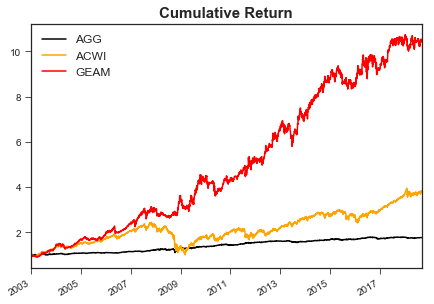

In [238]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

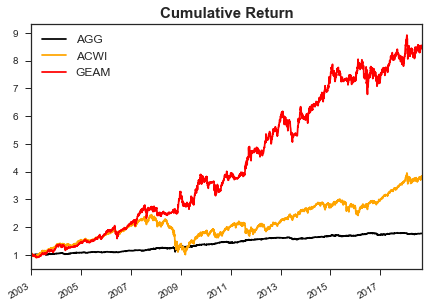

In [502]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

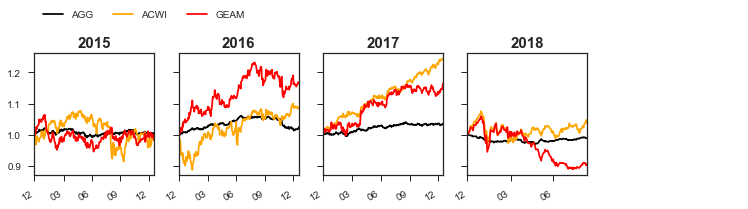

In [537]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2015))

In [226]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Philip,7.34,3946,13.46,24.96,0.54,-61.66,17.64,22.34,0.83,0.42,26.99,58.29,1.21,81.07
Turkey,2.76,3946,6.65,39.91,0.17,-76.62,9.22,33.78,0.28,1.35,41.41,56.68,1.01,-96.08
Korea,4.38,3946,9.81,31.69,0.31,-74.14,12.81,24.23,0.52,1.33,29.29,59.89,0.99,32.20
Belgium,3.49,3946,8.24,23.64,0.35,-74.10,13.96,16.87,0.81,1.05,22.37,57.75,1.09,-7.00
DualMomentum,10.25,3946,15.89,15.17,1.05,-21.71,16.64,14.95,1.11,0.20,8.74,62.03,1.44,96.63


In [545]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Norway,1.23,1966,2.65,24.79,0.11,-50.86,8.61,22.72,0.41,1.33,38.21,48.91,1.32,-0.38
Egypt,0.63,3191,-3.61,29.55,-0.12,-78.05,-4.05,28.70,-0.14,0.35,54.93,52.32,0.97,27.25
Singapore,4.89,3946,10.58,24.76,0.43,-63.80,14.57,19.57,0.82,1.03,26.43,59.36,1.09,42.60
Peru,1.84,2317,6.79,21.67,0.31,-60.62,7.19,19.54,0.37,0.82,39.46,54.13,1.14,-123.40
DualMomentum,10.44,3946,16.02,15.06,1.06,-20.71,17.22,14.60,1.17,0.19,8.98,62.03,1.46,95.70


In [342]:
usam = q.Backtester(
    base_params, w_type='ew', start='2002-12-31', assets=setting.assets_us_sector, n_picks=5, market='US', 
    sig_w_dynamic=False, 
    #sig_dyn_fwd=[20], 
    #sig_dyn_m_backs=6, 
    #sig_w_base=[1,0,0,1,0,1],
    sig_w_base=[0,0,0,0,0,0,1,0,0,0,0,0],
)

0.35880017280578613



2.4803998470306396


In [96]:
kfam = q.Backtester(
    base_params, w_type='ew', start='2002-12-31', assets=setting.assets_kr_factor, n_picks=5, 
    db=db_kr, 
    market='K200', supporter='KTB10Y', cash_equiv='KTB3Y', 
    follow_trend=(20,60), 
    follow_trend_market=(20,20), 
    support_cash=True, 
    sig_w_dynamic=True, 
    sig_w_base=[1,0,0,0,0,0,1,0,0,1,2,3],
)

HBox(children=(IntProgress(value=0, max=184), HTML(value='')))


4.587959289550781


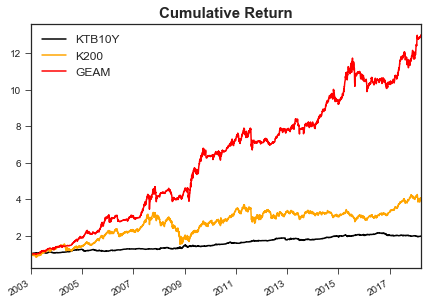

In [97]:
strats = ['KTB10Y', 'K200', 'DualMomentum']
names = ['KTB10Y', 'K200', 'GEAM']
color = ['k', 'orange', 'r']

kfam.plot_cum(strats, names=names, color=color, logy=False)

In [83]:
kfam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
HighDvd_kr,8.45,3778,15.17,17.62,0.86,-50.76,14.76,15.04,1.12,0.28,16.27,64.29,1.10,72.56
LowVol_kr,8.17,3778,14.91,17.21,0.87,-43.38,13.15,15.46,0.94,0.27,18.36,59.34,1.40,64.34
ACWI,3.67,3778,8.98,19.05,0.47,-58.79,13.73,13.16,1.10,1.00,22.47,62.64,0.99,61.96
MomentumGrowth_kr,14.61,3778,19.42,23.22,0.84,-57.83,18.18,20.82,0.98,0.35,25.13,58.79,1.42,69.23
DualMomentum,9.49,3778,16.06,12.26,1.31,-32.29,15.47,10.84,1.61,0.09,8.22,67.58,1.42,83.63


In [508]:
DualMomentumSelector(['2002-12-31'], **kfam.__dict__).sig/8*100

,Contrarian_kr,DvdGrowth_kr,Value_kr,Quality_kr,Turnaround_kr,LowVol_kr,KTB3Y,K200,HighDvd_kr,HighBeta_kr,KTB10Y,Momentum_kr,MomentumGrowth_kr,Growth_kr
2002-12-31,-8.599522,NaN,-6.416362,-4.917536,NaN,-6.219984,NaN,-9.02844,-9.685044,-6.717643,NaN,NaN,-6.228624,-8.868186


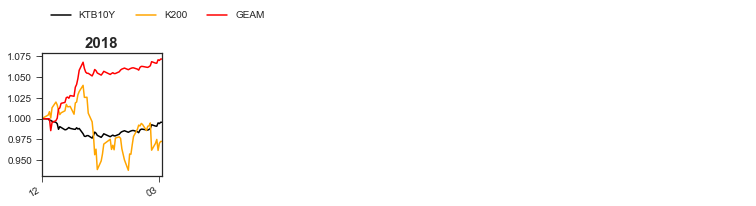

In [93]:
kfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2018))

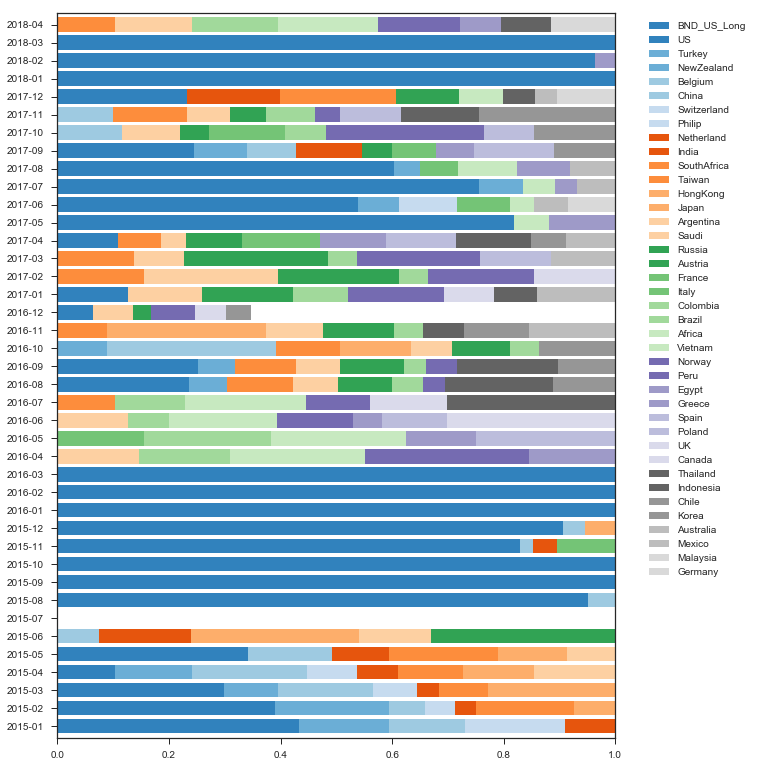

In [107]:
geam.plot_weight([2015, 2018])

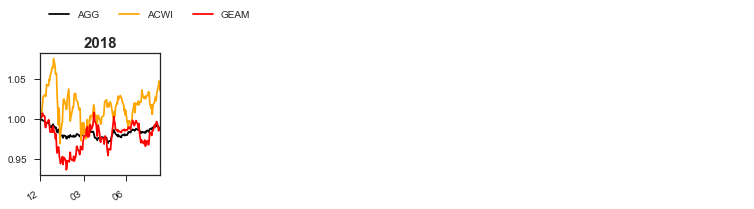

In [39]:
geam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2018))

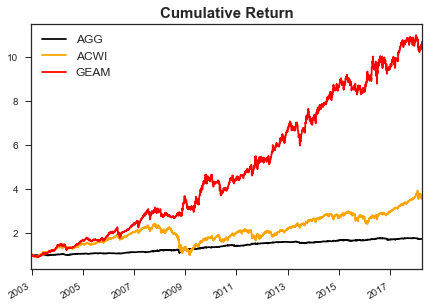

In [140]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

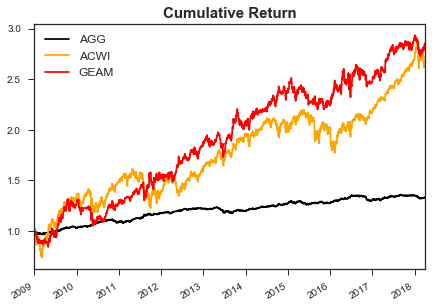

In [79]:
strats = ['BND_US_AGG', 'ACWI', 'DualMomentum']
names = ['AGG', 'ACWI', 'GEAM']
color = ['k', 'orange', 'r']

geam.plot_cum(strats, names=names, color=color, logy=False)

In [137]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
NewZealand,2.59,3839,6.39,12.28,0.52,-23.20,0.00,11.17,0.82,0.25,8.64,31.32,1.06,64.02
Russia,0.75,2751,-2.62,43.80,-0.06,-81.89,0.06,35.03,0.00,1.65,50.00,49.23,1.14,19.80
Chile,6.02,3839,12.40,23.04,0.54,-60.18,15.28,19.04,0.71,0.81,38.69,55.49,1.31,-45.83
Greece,0.70,1587,-5.37,43.46,-0.12,-77.39,10.20,40.40,0.25,1.65,43.57,51.35,1.04,28.94
DualMomentum,10.69,3839,16.69,15.32,1.09,-21.29,16.64,14.74,1.16,0.20,7.41,63.19,1.43,96.00


In [103]:
geam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Philip,3.79,2328,15.38,21.75,0.71,-31.77,13.39,21.95,0.65,0.54,28.19,59.09,1.30,16.66
Greece,0.70,1587,-5.37,43.46,-0.12,-77.39,10.20,40.40,0.25,1.65,43.57,51.35,1.04,28.94
HongKong,3.21,2328,13.36,19.93,0.67,-29.94,14.12,16.94,0.87,0.86,22.70,63.64,1.08,46.76
Netherland,2.61,2328,10.88,23.44,0.46,-33.86,10.09,19.34,0.47,1.17,27.08,60.91,1.04,76.93
DualMomentum,3.03,2328,12.65,15.52,0.82,-20.39,13.37,14.44,0.92,0.26,6.78,61.82,1.31,96.01


In [183]:
isinstance(3, float)

False

In [439]:
base_params = {
    'start': '2002-12-31', 
    'end': '2018-08-31', 
    'db': db, 
    'assets': setting.assets_fi, 
    'price': {'price_src':'reprice', 'trade_tol':'at_close'}, 
    'trade': {
        'trade_assets': [
            #('BND_US_Long', {'BND_US_Interm':0.3, 'BND_US_Short':0.2}), 
            #('BND_US_Long', {'BND_US_Long':1.0}), 
        ], 
        'trade_prev_nav_based': True, 
        'trade_delay': 1, 
        'cash': 100000000, 
        'expense': 0.001, 
        'gr_exposure': 0.99, }, 
    'selecting': {
        'mode': 'DualMomentum', 
        'sig_mixer': {
            'sig_w_base': [1,0,0,0,0,0,1,0,0,1,2,3], 
            'sig_w_term': 21, 
            'sig_w_dynamic': False, 
            'sig_dyn_fwd': 21*np.array([1,2]), 
            'sig_dyn_m_backs': 24, 
            'sig_dyn_n_sample': 63, 
            'sig_dyn_thres': 0.0, }, 
        'market': 'BND_US_AGG', # None도 가능
        'supporter': 'BND_US_Long', 
        'cash_equiv': 'BND_US_AGG', 
        'overwrite_to_bet': [], # base_params flattening 하므로, 반드시 list of tuple로 입력
        'follow_trend': (20,60), 
        'follow_trend_market': (20, 60), 
        'n_picks': 10, }, 
    'weighting': {
        'w_type': 'ranky2', 
        'eaa_wr': 1.0, 
        'eaa_wc': 1.0, 
        'eaa_wr_bnd': 0.5, 
        'eaa_short_period': 20, 
        'iv_period': 60, 
        'w_max': 1.0, }, 
    'stats_opts': {
        'beta_to': 'ACWI', 
        'stats_n_roll': 250, }, 
    'reinforce': {
        'follow_trend_supporter': (60, 250), 
        'support_cash': True, }, 
    'te_control': {
        'bm': None, #'ACWI', 
        'te_target': None, 
        'te_k': 0.3, 
        'te_short_period': 20, 
        'te_short_up_down_ratio_cap': True, 
        'te_short_target_cap': True, 
        'te_smoother': False, 
        'safety_buffer': 0.8, }, 
    'cash_manager': {
        'cm_method': None, #'cp', 
        'up_down_ratio_period': 20, 
        'kelly_type': 'semivariance', 
        'kelly_vol_period': 250, 
        'kelly_self_eval': True, }
}

In [440]:
gfam = q.Backtester(base_params, w_type='ranky2', n_picks=5)


1.3727912902832031


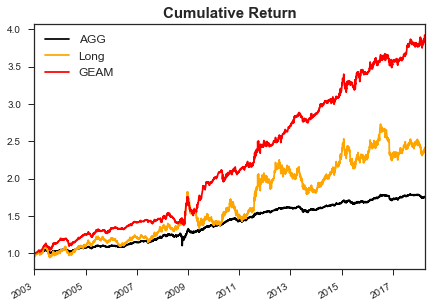

In [250]:
strats = ['BND_US_AGG', 'BND_US_Long', 'DualMomentum']
names = ['AGG', 'Long', 'GEAM']
color = ['k', 'orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

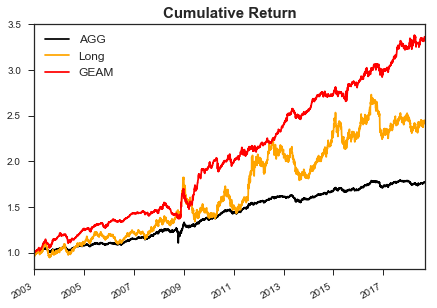

In [429]:
strats = ['BND_US_AGG', 'BND_US_Long', 'DualMomentum']
names = ['AGG', 'Long', 'GEAM']
color = ['k', 'orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

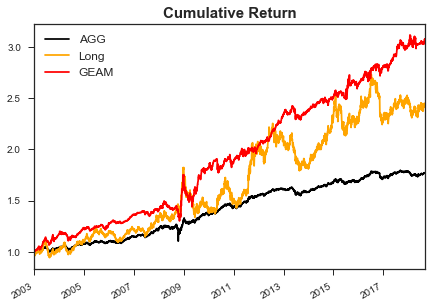

In [441]:
strats = ['BND_US_AGG', 'BND_US_Long', 'DualMomentum']
names = ['AGG', 'Long', 'GEAM']
color = ['k', 'orange', 'r']

gfam.plot_cum(strats, names=names, color=color, logy=False)

In [51]:
gfam.stats.tail()

,beta,cagr,cagr_roll_med,consistency,cum_last,hit,loss_proba,mdd,n_samples,profit_to_loss,sharpe,sharpe_roll_med,std,std_roll_med
BND_DevHY_loc,0.31,7.81,7.52,-26.47,1.94,56.73,30.38,-24.07,2204,1.25,0.70,0.65,11.16,11.36
BND_US_Long,-0.28,5.91,6.49,94.38,2.41,54.95,23.12,-26.58,3839,1.24,0.44,0.56,13.53,12.78
BND_US_CB,0.44,6.88,9.53,77.79,2.77,65.75,25.81,-47.67,3829,0.91,0.63,1.03,10.89,9.15
BND_US_Pref,0.56,4.94,5.40,69.84,2.03,67.63,17.28,-65.55,3658,0.75,0.26,0.94,18.86,6.09
DualMomentum,-0.05,9.12,7.52,98.29,3.82,69.78,3.09,-14.26,3839,1.15,1.17,1.16,7.77,6.79


In [30]:
gfam.stats.tail()

,beta,cagr,cagr_roll_med,consistency,cum_last,hit,loss_proba,mdd,n_samples,profit_to_loss,sharpe,sharpe_roll_med,std,std_roll_med
BND_EmSov_usd,0.14,8.15,8.46,87.65,3.33,70.33,15.77,-34.70,3839,0.88,0.86,1.46,9.43,6.80
BND_US_TIP,-0.05,4.14,3.98,88.73,1.86,64.29,23.20,-14.57,3839,0.99,0.67,0.83,6.22,5.48
Global,1.10,3.24,6.26,15.48,1.43,54.96,36.60,-61.52,2787,1.01,0.13,0.31,24.21,18.74
BND_US_HY,0.35,6.44,6.81,89.71,2.61,69.23,16.60,-34.25,3839,0.83,0.61,1.34,10.52,6.43
DualMomentum,0.00,8.53,7.10,97.77,3.51,67.03,3.90,-12.62,3839,1.34,1.26,1.25,6.76,5.64


In [26]:
gfam.stats.tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
BND_US_Muni,1.51,2771,3.80,5.31,0.72,-12.33,3.48,3.94,0.83,0.00,18.99,64.12,1.04,93.08
ACWI,3.80,3946,8.83,18.63,0.47,-58.79,13.42,12.52,1.09,1.00,22.32,63.10,0.98,65.88
BND_US_IG,2.08,3946,4.76,7.67,0.62,-21.54,5.16,5.70,0.91,0.04,17.53,62.03,1.12,95.47
BND_US_Interm,1.89,3946,4.12,6.58,0.63,-10.40,4.68,6.07,0.73,-0.13,23.80,55.61,1.37,93.93
DualMomentum,3.42,3946,8.11,6.55,1.24,-12.00,6.84,5.62,1.24,0.01,3.52,65.78,1.37,97.62


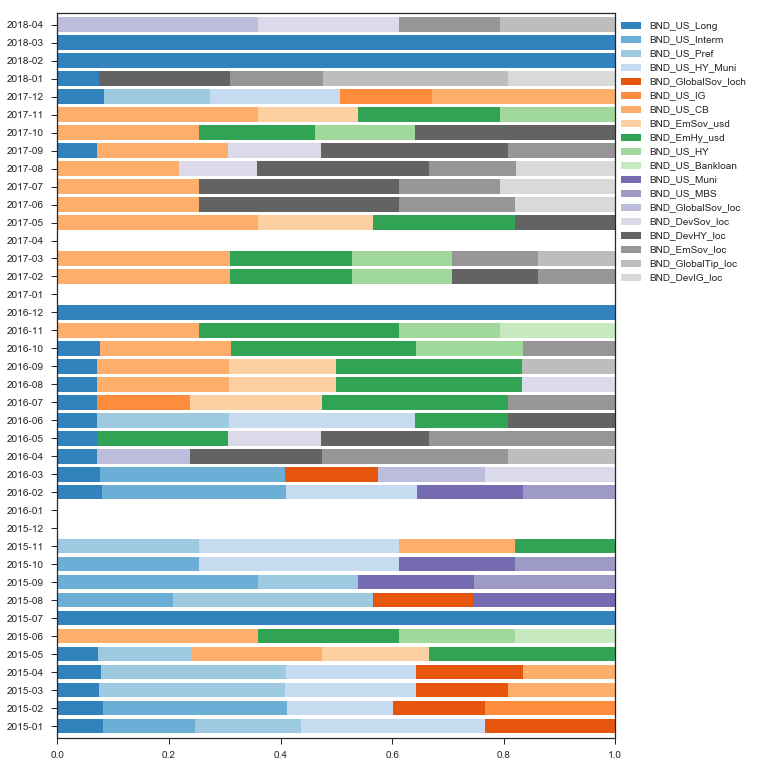

In [132]:
gfam.plot_weight([2015, 2018])

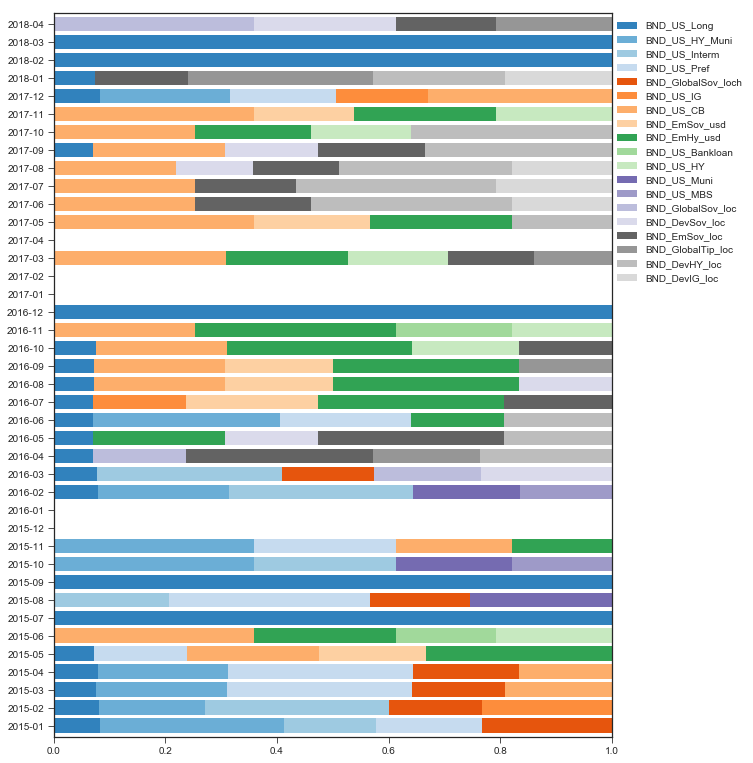

In [48]:
gfam.plot_weight([2015, 2018])

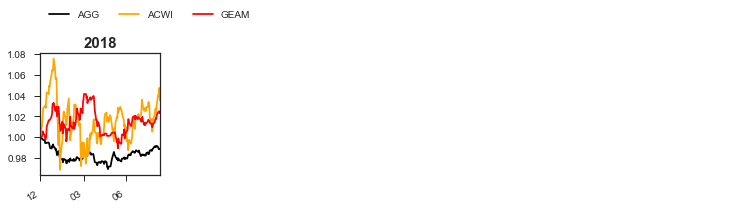

In [37]:
gfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2018))

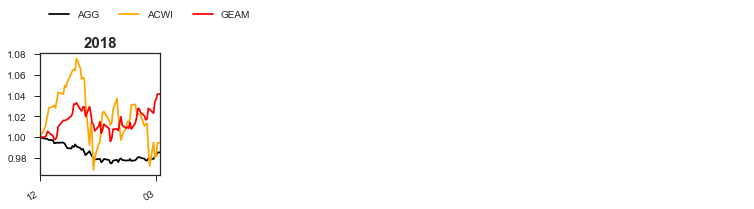

In [34]:
gfam.plot_cum_yearly(strats, names=names, color=color, remove=range(2003,2018))